#Cloning the github repository

In [ ]:
!git clone https://github.com/Omenranr/mle-2020

Cloning into 'mle-2020'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 47 (delta 11), reused 37 (delta 6), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [ ]:
cd mle-2020

/content/mle-2020


#Libraries importation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from math import sqrt

#Data importation

In [ ]:
users = pd.read_csv("data/users.csv")
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")

#Data exploration

##First exploration of the data

In [ ]:
print("Users number {0}".format(users["user_id"].count()))
print("Movies number {0}".format(movies["movie_id"].count()))
print("Ratings number {0}".format(ratings["user_id"].count()))

Users number 6040
Movies number 3883
Ratings number 1000209


In [ ]:
users.head()

,user_id,gender,age,occupation,zip_code
0,0,F,1,10,48067
1,1,M,56,16,70072
2,2,M,25,15,55117
3,3,M,45,7,02460
4,4,M,25,20,55455


In [ ]:
movies.head()

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Jumanji,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Grumpier Old Men,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Father of the Bride Part II,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings.head()

,user_id,movie_id,rating
0,0,1192,5
1,0,660,3
2,0,913,3
3,0,3407,4
4,0,2354,5


##Some data visualization

###Univariate data *visualization*

####Data visualization related to users

We can see from the histogram that the age variable follows aproximately a normal distribution, with a mean = 35 and a mode = 25. The majority of the users are between 18 and 35.

In [ ]:
print("Age variable mode: {0}".format(users["age"].mode()))
print("Age variable mean: {0}".format(users["age"].mean()))
print("Age variable median: {0}".format(users["age"].median()))

Age variable mode: 0    25
dtype: int64
Age variable mean: 30.639238410596025
Age variable median: 25.0


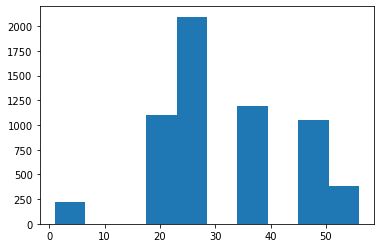

In [ ]:
_ = plt.hist(users["age"])

The gender variable is clearely not balanced, in fact males constitute x2 of females number. This can impact the ratings and types of movies watched due to the difference of interest between the two genders, thus it can impact the recommendation.

Number of Females (0):  4331
Number of Males: (1) 1709


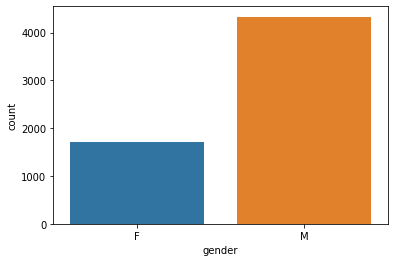

In [ ]:
ax = sns.countplot(x = users['gender'])
female, male = users['gender'].value_counts()
print('Number of Females (0): ', female)
print('Number of Males: (1)', male)

####Data visualization related to movies

We have two predominant movie types in our dataset. The first one is **drama** and **comedy**. Followed by **Romance**, **Thriller** and **Action**, and then **Children's**, **Adventure**, **Horror**, **Sci-Fi**...etc. The least frequent types are **Film-noir**, **Fantasy** and **Western**.

The frequency of each type will influence the recommendations. In fact, movies belonging to these types have better chance to be recommended based on similarity. 

In [ ]:
#generating the movies type frequency array
moviesFreq = [movies[column].sum() for column in movies.drop(["movie_id", "title", "year"], axis=1).columns]

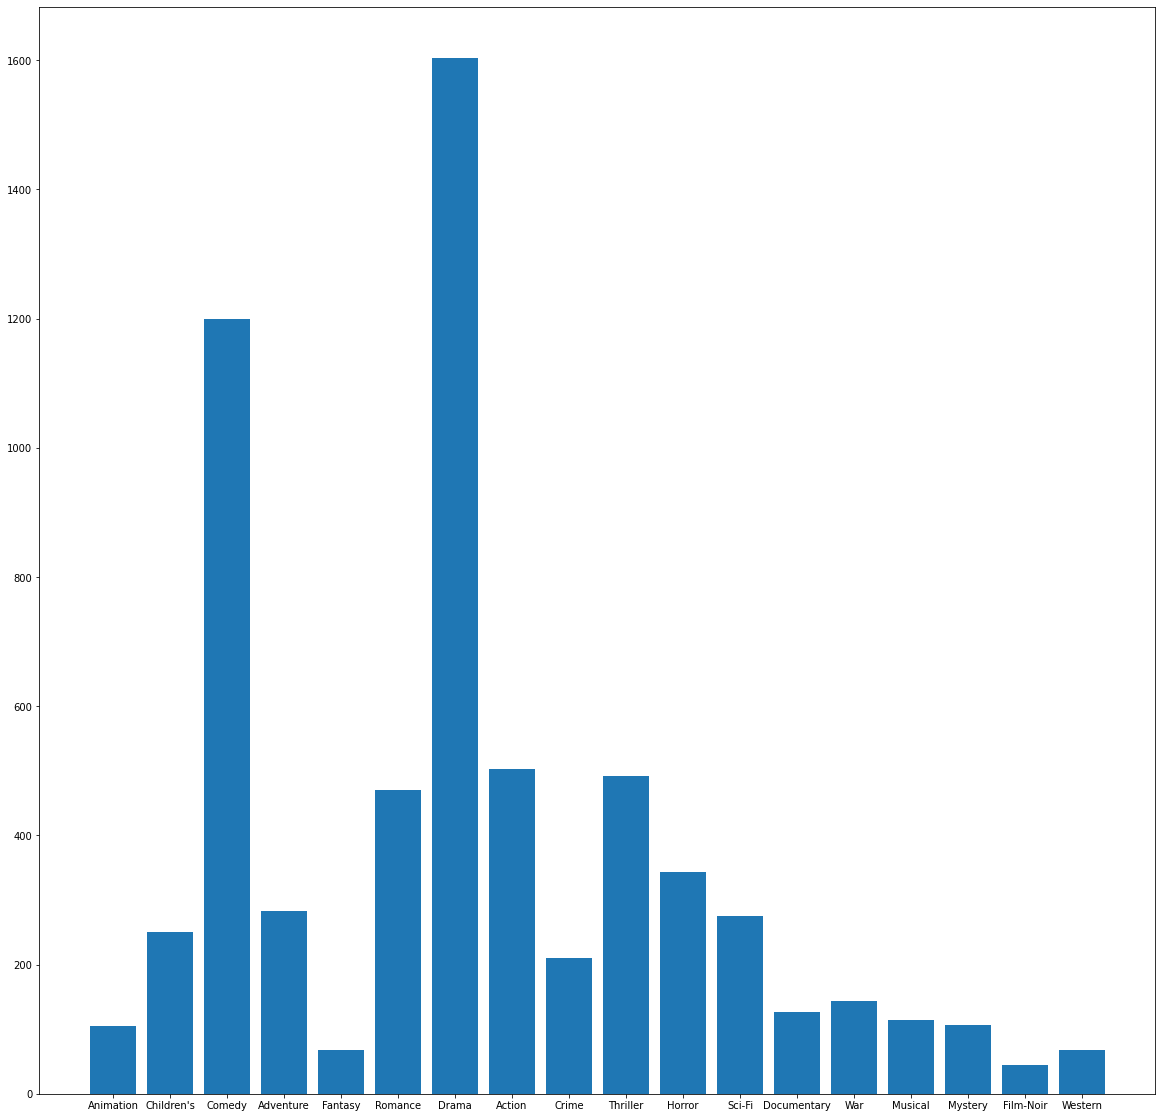

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
_ = plt.bar(movies.drop(["movie_id", "title", "year"], axis=1).columns, moviesFreq)

The frequency of movies is increasing exponentially with time. This can also influence the recommendations knowing that newer movies are more frequent and thus have better presence in the platform.

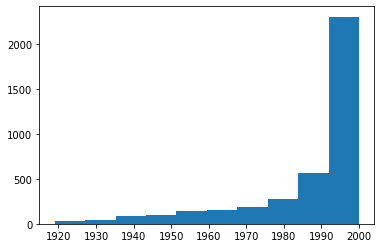

In [ ]:
_ = plt.hist(movies["year"])

####Data visualization related to ratings

Ratings are very important, because it can be used to recommend movies based on how much users liked the movie with a users similarity approach.

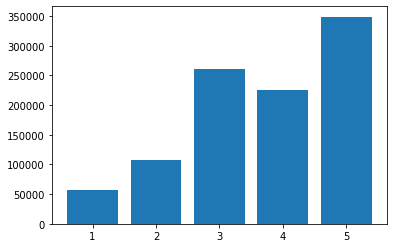

In [ ]:
_ = plt.bar(ratings["rating"].unique(), ratings["rating"].value_counts())

###Bivariate data visualization

We're going to see ratings by categories. To do that we're going to calculate for each category the number of movies beloging to it, then we're going to show for each category the number of 1,2,3,4 and 5 rates.

In [ ]:
categories = movies.drop(["title", "year", "movie_id"], axis=1).columns

In [ ]:
#Calculating number of each rating level for the different categories
moviesRatings = movies.merge(ratings, on="movie_id")
moviesRatings.head()

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,user_id,rating
0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
1,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
2,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5
4,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,5


In [ ]:
groupedMoviesRatings = moviesRatings.groupby("rating")
categoryRatings = pd.DataFrame(columns=categories)

In [ ]:
for rating in moviesRatings["rating"].unique():
  notCategory = ["title", "movie_id", "year", "user_id", "rating"]
  ratingGroup = groupedMoviesRatings.get_group(rating).drop(notCategory, axis=1).sum()
  ratingGroup["rating"] = rating
  categoryRatings = categoryRatings.append(ratingGroup, ignore_index=True)

In [ ]:
categoryRatings.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,rating
0,10795.0,13574.0,73530.0,26608.0,6989.0,32059.0,96629.0,52187.0,20893.0,41408.0,12162.0,32441.0,2684.0,23423.0,10495.0,10039.0,7053.0,4965.0,5.0
1,15841.0,23704.0,123415.0,44343.0,11725.0,53440.0,131811.0,86579.0,28454.0,66808.0,21926.0,50756.0,3032.0,24119.0,14616.0,14261.0,6889.0,7346.0,4.0
2,10973.0,20396.0,96946.0,37867.0,10491.0,40428.0,84821.0,70728.0,19542.0,50127.0,21400.0,42892.0,1446.0,13684.0,10550.0,10117.0,3224.0,5357.0,3.0
3,3587.0,8637.0,41073.0,16641.0,4729.0,15249.0,29154.0,31432.0,7433.0,21256.0,11970.0,20153.0,477.0,4854.0,3779.0,4026.0,829.0,1945.0,2.0
4,2097.0,5875.0,21616.0,8494.0,2367.0,6347.0,12114.0,16531.0,3219.0,10081.0,8928.0,11052.0,271.0,2447.0,2093.0,1735.0,266.0,1070.0,1.0


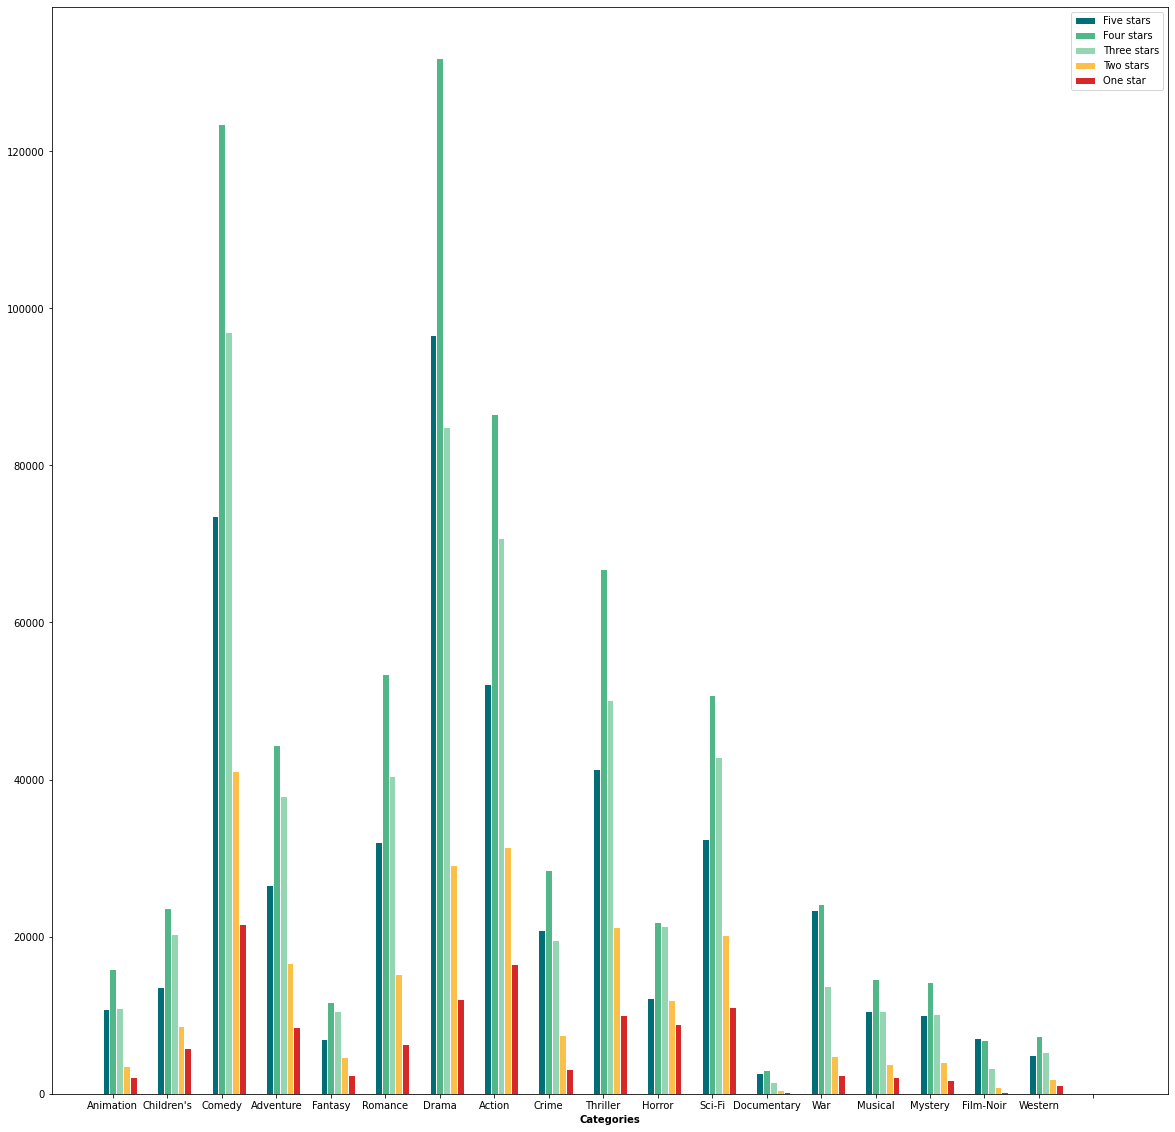

In [ ]:
# set width of bar
barWidth = 0.25
values = categoryRatings.values
# Set position of bar on X axis
rs = [np.arange(len(values[0])) * 2]
for i in range(1, 5):
  rs.append([x + barWidth for x in rs[i-1]])
 
# Make the plot
fig, ax = plt.subplots(figsize = (20, 20))
colors = ["#006d77", "#52b788", "#95d5b2", "#fcbf49", "#d62828"]
labels = ['Five stars', 'Four stars', 'Three stars', 'Two stars', 'One star']
for i in range(5):
  plt.bar(rs[i], values[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i])
# Add xticks on the middle of the group bars
plt.xlabel('Categories', fontweight='bold')
plt.xticks([2 * r + barWidth for r in range(len(values[0]))], categories)
 
# Create legend & Show graphic
plt.legend()
plt.show()

From this visualization we can get the most rated categories + the rating distribution for each category. This gives as in insight on wether or not a movie belonging to a given category will have higher chances to be recommended.

#Movies recommendation

There is two main technics that can be applied to this dataset to perform movies recommendation. The first one is the content filtering based recommendation, the second one is the collaborative filtering based recommendation. We're going to implement them both.

##Content-based filtering
Method description:\
The content-based filtering is based on ratings given by a specific user to recommend him items similar to what he liked the most. This is very good because it's specific to each user.\
Steps:
1. Implementing a similarity measure between movies
2. Getting the top rated movies for a given user
3. Recommending a movie using the top similar movie to each top rated movie by the user.

###1- calculating a similarity measure between movies

To get the similarity between two movies we calculate the sum of the element wise multiplication between the two one-hot encoded category arrays. This will give the number of categories two movies share.

In [ ]:
movieCategories = movies.drop(["title", "movie_id", "year"], axis=1)

In [ ]:
def getSimilarity(topMovies, allMovies):
  '''
  description: This function return the similarity score between a given movie and the other movies in the dataset
  parameters:
    movie: category one-hot encoded dataFrame.
    allMovies: dataset's movies dataFrame.
  output:
    similarity: array(number_of_movies, 1) of the similarity score between the movie and the other ones.
  '''
  similarity =  np.matmul(topMovies.values, allMovies.values.T)
  return similarity

###2- Getting the top rated movies for a given user

In [ ]:
def getUserTopMovies(user_id, movies, ratings, limit=None):
  '''
  description: This function returns the top rated movies by a given user.
  parameters:
    user_id: the user's id.
    movies: all the movies in the dataset.
    ratings: all the ratings in the dataset.
  output:
    topMovies: dataFrame of the top rated movies.
  '''
  topMovies = ratings[ratings["user_id"] == user_id].sort_values(by="rating", ascending=False)
  if(limit):
    topMovies = topMovies.head(limit)
  topMovies = movies.merge(topMovies, on="movie_id")
  return topMovies

In [ ]:
getUserTopMovies(0, movies, ratings, limit=5)

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,user_id,rating
0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
1,1028,Dumbo,1941,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,5
2,1192,One Flew Over the Cuckoo's Nest,1975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
3,1960,Rain Man,1988,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
4,3104,Awakenings,1990,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5


###3- recommending a movie

In [ ]:
def recommendMovie(user_id, movies, ratings, limit=None):
  '''
  description: this function gives a movie recommendation using content-based approach, given a user_id, movies of the dataset and ratings.
  parameters:
    user_id: the user_id we want to recommend to.
    movies: movies of our dataset.
    ratings: ratings of our dataset.
    limit: limit of top liked movies by user we want to keep.
  output:
    moviesRecommendation: dataFrame of the recommended movies.
  '''
  notCategory = ["movie_id", "title", "year"]
  #getting the user's top liked movies:
  topMovies = getUserTopMovies(user_id, movies, ratings, limit)
  topMoviesCategories = topMovies.drop(notCategory + ["user_id", "rating"], axis=1)
  moviesCategories = movies.drop(notCategory, axis=1)
  similarity = getSimilarity(topMoviesCategories, moviesCategories)
  similarity = pd.DataFrame(similarity, columns=list(movies["movie_id"]))
  recommendedMovieIds = list(similarity.idxmax(axis=1).drop_duplicates())
  return movies.iloc[recommendedMovieIds]

In [ ]:
recommendedMovies = recommendMovie(1, movies, ratings, limit=10)

In [ ]:
recommendedMovies

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
109,110,Taxi Driver,1976,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,160,Crimson Tide,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,"American President, The",1995,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,21,Copycat,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,15,Casino,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,23,Powder,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##Collaborative filtering
Collaborative filtering is based on the similarity between the ratings of the targeted user and the other ratings from the other users. By calculating this similarity we can then recommend movies that have the highest similarity score.\
Steps:
1. Get the watched movies of the targeted user and the similar users
2. Calculating a similarity score (Pearson's score) 
3. Do a recommendation based on the top nearest movies

Since we are going to use only the ratings we don't need category data, thus we will remove it.

In [ ]:
noCategoriesMovies = movies[["movie_id", "title", "year"]]

In [ ]:
noCategoriesMovies.head(3)

,movie_id,title,year
0,0,Toy Story,1995
1,1,Jumanji,1995
2,2,Grumpier Old Men,1995


###1. Get the watched movies of the targeted user:
We're going to get the watched movies and the ratings given to each movie by a targeted user from the ratings + movies dataFrames.

The function will also get the users who watched the same movies as our targeted user.

In [ ]:
def getWatchedMovies(user_id, ratings, movies):
  '''
  description: this function returns the watched movies given a user id.
  parameters:
    user_id: the user's id
    ratings: the whole ratings dataFrame
    movies: the whole movies dataFrame
  output:
    watchedMovies: a dataFrame containing the informations about the movies watched
    similarUsers: a dataFrame containing the users who watched the same movies
  '''
  watchedMovies = ratings[ratings["user_id"] == user_id].sort_values(by="rating", ascending=False)
  watchedMovies =  movies.merge(watchedMovies, on="movie_id")
  similarUsers = ratings[ratings['movie_id'].isin(watchedMovies['movie_id'].tolist())]
  return watchedMovies, similarUsers

In [ ]:
watchedMovies, similarUsers = getWatchedMovies(0, ratings, noCategoriesMovies)

visualization of the users with similar watched movies (user_id=1)

In [ ]:
usersSubsetGroup = similarUsers.groupby(['user_id'])

In [ ]:
usersSubsetGroup.get_group(1)

,user_id,movie_id,rating
72,1,3104,4
107,1,2027,4
120,1,1192,5
150,1,2320,3
168,1,1961,5
173,1,1206,4
179,1,1245,5


###2. Calculating a similarity score:

In [ ]:
user_id = 0
watchedMovies, similarUsers = getWatchedMovies(user_id, ratings, movies)

In [ ]:
groupedUsers = similarUsers.groupby(['user_id'])
groupedUsers = sorted(groupedUsers, key=lambda x: len(x[1]), reverse=True)
groupedUsers = groupedUsers[0:50]
pearsonScore = {}
for name, group in groupedUsers:
  group = group.sort_values(by='movie_id')
  watchedMovies = watchedMovies.sort_values(by='movie_id')
  n = len(group)
  temp = watchedMovies[watchedMovies['movie_id'].isin(group['movie_id'].tolist())]
  print(temp)

    movie_id                                            title  ...  user_id  rating
0          0                                        Toy Story  ...        0       5
1         47                                       Pocahontas  ...        0       5
2        149                                        Apollo 13  ...        0       5
3        259               Star Wars: Episode IV - A New Hope  ...        0       4
4        526                                 Schindler's List  ...        0       5
5        530                               Secret Garden, The  ...        0       4
6        587                                          Aladdin  ...        0       4
7        593                  Snow White and the Seven Dwarfs  ...        0       4
8        594                             Beauty and the Beast  ...        0       5
9        607                                            Fargo  ...        0       4
10       660                        James and the Giant Peach  ...        0 

In [ ]:
from scipy.stats import pearsonr

In [ ]:
def getSimilarityScore(watchedMovies, similarUsers):
  '''
  description: this function calculates the pearson's similarity between our user and the other users who watched the same movies.
  parameters:
    watchedMovies: the targeted user's watch history.
    similarUsers: users that have seen the same movies.

  output:
    similarityScore: score for each watched movie.
  '''
  groupedUsers = similarUsers.groupby(['user_id'])
  groupedUsers = sorted(groupedUsers,  key=lambda x: len(x[1]), reverse=True)
  #we will keep only the 50 first rows
  groupedUsers = groupedUsers[0:50]
  pearsonScore = {}
  #For every user group in our subset
  for name, group in groupedUsers:
      #Let's start by sorting the input and current user group so the values aren't mixed up later on
      group = group.sort_values(by='movie_id')
      watchedMovies = watchedMovies.sort_values(by='movie_id')
      #Get the N for the formula
      n = len(group)
      #Get the review scores for the movies that they both have in common
      temp = watchedMovies[watchedMovies['movie_id'].isin(group['movie_id'].tolist())]
      #And then store them in a temporary buffer variable in a list format to facilitate future calculations
      tempRatingList = temp['rating'].tolist()
      #put the current user group reviews in a list format
      tempGroupList = group['rating'].tolist()
      pearsonScore[name] = pearsonr(tempRatingList, tempGroupList)[0]
      '''
      #Now let's calculate the pearson correlation between two users, so called, x and y
      Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
      Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
      Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
      
      #If the denominator is different than zero, then divide, else, 0 correlation.
      if Sxx != 0 and Syy != 0:
          pearsonScore[name] = Sxy/sqrt(Sxx*Syy)
      else:
          pearsonScore[name] = 0
      '''
  similarityScore = pd.DataFrame.from_dict(pearsonScore, orient='index')
  similarityScore.columns = ['similarity_score']
  similarityScore['user_id'] = similarityScore.index
  similarityScore.index = range(len(similarityScore))
  similarityScore = similarityScore.sort_values(by='similarity_score', ascending=False)[0:50]
  return similarityScore

Of course we can see that the similarity score for the targeted user is equal to 1. In fact, for score=1 the similarity is maximal and for score=-1 the similarity is minimal. We're going to remove the first row to avoid a wrong recommendation.

In [ ]:
getSimilarityScore(watchedMovies, similarUsers).head()

,similarity_score,user_id
0,1.000000,0
45,0.429900,1612
13,0.409159,677
3,0.348491,2072
48,0.337346,1779


###3- Performing the recommendation:

In [ ]:
def getRecommendation(user_id, ratings, movies):
  '''
  description: this function gives a collaborative based movie recommendation given a user, ratings, and movies.
  parameters:
    user_id: the targeted user's id (int).
    ratings: a dataFrame of the ratings of the whole dataset.
    movies: a dataFrame the movies of the whole dataset.
  output:
    recommendedMovies: a dataFrame of the recommendedMovies.
  '''
  watchedMovies, similarUsers = getWatchedMovies(0, ratings, movies)
  similarityScore = getSimilarityScore(watchedMovies, similarUsers)
  #removing the targeted user's score which is equal to 1.
  similarityScore = similarityScore.iloc[1:]
  #merging with the ratings dataFrame to get the ratings of the similar users.
  topUsersRating = similarityScore.merge(ratings, left_on='user_id', right_on='user_id', how='inner')
  #calculating a weighed value of the rating based on the similarity score
  topUsersRating['weighted_rating'] = topUsersRating['similarity_score'] * topUsersRating['rating']
  #calculating a sum of the weighted ratings for each movie
  tempTopUsersRating = topUsersRating.groupby('movie_id').sum()[['similarity_score','weighted_rating']]
  tempTopUsersRating.columns = ['sum_similarity_index', 'sum_weighted_rating']
  recommendedMovies = pd.DataFrame()
  #Getting the average of weighted ratings
  recommendedMovies['weighted_average_recommendation_score'] = tempTopUsersRating['sum_weighted_rating']/tempTopUsersRating['sum_similarity_index']
  recommendedMovies['movie_id'] = tempTopUsersRating.index
  #sorting by the value of the weighted average recommendation score
  recommendedMovies = recommendedMovies.sort_values(by='weighted_average_recommendation_score', ascending=False)
  #returning the top 10 most similar movies
  return movies.loc[movies['movie_id'].isin(recommendedMovies.head(10)['movie_id'].tolist())]

In [ ]:
getRecommendation(0, ratings, noCategoriesMovies)

,movie_id,title,year
310,312,"Swan Princess, The",1994
458,461,"Good Man in Africa, A",1994
1714,1769,B. Monkey,1998
1833,1901,Dream for an Insomniac,1996
2035,2103,Tex,1982
2256,2324,Orgazmo,1997
2624,2692,Trekkies,1997
2804,2872,Lulu on the Bridge,1998
2980,3048,How I Won the War,1967
3247,3315,Reindeer Games,2000


#Results analysis, and comparison between the two methods:

let's see the movies recommended by both approachs

In [ ]:
recommendMovie(0, movies, ratings, limit=20)

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,47,Pocahontas,1995,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,40,Richard III,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
106,107,Catwalk,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
255,257,"Kid in King Arthur's Court, A",1995,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,168,Free Willy 2: The Adventure Home,1995,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,110,Taxi Driver,1976,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
getRecommendation(0, ratings, noCategoriesMovies)

,movie_id,title,year
310,312,"Swan Princess, The",1994
458,461,"Good Man in Africa, A",1994
1714,1769,B. Monkey,1998
1833,1901,Dream for an Insomniac,1996
2035,2103,Tex,1982
2256,2324,Orgazmo,1997
2624,2692,Trekkies,1997
2804,2872,Lulu on the Bridge,1998
2980,3048,How I Won the War,1967
3247,3315,Reindeer Games,2000


We can see that the recommended movies are not similar for both approachs and this can explained by the difference in the two methods. In fact the first gets it's data from specifically the targeted user's pereferences in terms of movies and similarity between the other movies, while the second method gives a similarity based on other similar users pereferences. Both methods are good at recommendation, but the collaborative-based method don't scale well since we'll have higher time of computation when the number of users increases + the collaborative filtering don't resolve the "cold start problem" for new movies since we don't have enough data on the ratings, while content-based recommendation can resolve this issue since it's based on similarity in terms of categories not ratings.

To evaluate the performance of the two methods we can perform MSE score evaluation between the target users preferences and the given ones. Other metrics can be also considered such as MAE, and decision support methods. However we need to know what are the relevant recommendations, to do that we can split the ratings for a given user and then evaluate on a part and compare with the other one.

#Conclusion

In this notebook, I've been able to implement both the content-based recommendation technique and the collaborative filtering recommendation technique. I've tried to write a clean code using generic functions with descriptions. I also had the chance to understand and analyze the problem using data visualization and data exploration, I also analyzed the different techniques and it's advantages and disadvantages during the implementation.